PIPELINE FINISHED Merged DF updated

## Testing various merged_label size for optimal train / test size

In [21]:
##DSC80 environment
import os
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier
import random


# read csv file
data = pd.read_csv("../../data/merged_label.csv")
data.head()

,link,label,text
0,https://www.science.org/doi/10.1126/science.ad...,1,Improved charge extraction in inverted perovsk...
1,https://www.nature.com/articles/s41566-019-0398-2,1,Surface passivation of perovskite film for eff...
2,https://www.nature.com/articles/s41560-020-007...,1,Intact 2D/3D halide junction perovskite solar ...
3,https://www.science.org/doi/10.1126/science.ab...,1,Deterministic fabrication of 3D/2D perovskite ...
4,https://www.nature.com/articles/s41467-021-236...,1,Multication perovskite 2D/3D interfaces form v...


In [22]:
# Function to calculate Balanced Error Rate
def balanced_error_rate(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    ber = 1 - (sensitivity + specificity) / 2
    return ber

# Model Evaluation Function with Train/Test Accuracy
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name="Model"):
    # Predictions on test and train sets
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    # Accuracy scores
    test_accuracy = accuracy_score(y_test, y_pred_test)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    
    # Classification report for recall
    report = classification_report(y_test, y_pred_test, output_dict=True)
    test_recall = report['1']['recall'] 
    
    # Balanced Error Rate for test set
    test_ber = balanced_error_rate(y_test, y_pred_test)
    
    print(f"\nEvaluation Report for {model_name}:\n")
    print("Classification Report (Test Set):\n", classification_report(y_test, y_pred_test))
    print("Confusion Matrix (Test Set):\n", confusion_matrix(y_test, y_pred_test))
    print(f"Test Accuracy: {test_accuracy}")
    print(f"Train Accuracy: {train_accuracy}")
    print(f"Test Recall): {test_recall}")
    print("Balanced Error Rate (Test Set):", test_ber)
    
    # Return metrics as dictionary for further use
    return {
        "model_name": model_name,
        "train_accuracy": train_accuracy,
        "test_accuracy": test_accuracy,
        "test_recall": test_recall,
        "test_ber": test_ber
    }

In [23]:
data

,link,label,text
0,https://www.science.org/doi/10.1126/science.ad...,1,Improved charge extraction in inverted perovsk...
1,https://www.nature.com/articles/s41566-019-0398-2,1,Surface passivation of perovskite film for eff...
2,https://www.nature.com/articles/s41560-020-007...,1,Intact 2D/3D halide junction perovskite solar ...
3,https://www.science.org/doi/10.1126/science.ab...,1,Deterministic fabrication of 3D/2D perovskite ...
4,https://www.nature.com/articles/s41467-021-236...,1,Multication perovskite 2D/3D interfaces form v...
...,...,...,...
459,https://www.sciencedirect.com/science/article/...,0,The central role of colloids to explain the cr...
460,https://www.sciencedirect.com/science/article/...,0,The central role of colloids to explain the cr...
461,https://www.sciencedirect.com/science/article/...,0,The central role of colloids to explain the cr...
462,https://doi.org/10.1063/1.1404988,0,The charge of glass and silica surfaces | The ...


## Creating different data_size df

In [24]:
Merged_size = [466, 400, 350, 300]

# list to keep record of performance metric
recall_before = []
accuracy_before = []
ber_before = []

In [25]:
# # Convert the text data to TF-IDF features
# tfidf_vectorizer = TfidfVectorizer(max_features=4000)  # Adjust max_features as needed
# X = tfidf_vectorizer.fit_transform(data['text'])  
# y = data['label'] 
# # Split into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
## Default data size - 132

# Convert the text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=4000)  # Adjust max_features as needed
X_132 = tfidf_vectorizer.fit_transform(data['text'])  
y_132 = data['label'] 
# Split into training and testing sets
X_train_132, X_test_132, y_train_132, y_test_132 = train_test_split(X_132, y_132, test_size=0.2, random_state=42)

In [27]:
## Default data size - 400
data_100 = data.sample(n=400, random_state=42)  # random_state ensures reproducibility

# Convert the text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=4000)  # Adjust max_features as needed
X_100 = tfidf_vectorizer.fit_transform(data_100['text'])  
y_100 = data_100['label'] 
# Split into training and testing sets
X_train_100, X_test_100, y_train_100, y_test_100 = train_test_split(X_100, y_100, test_size=0.2, random_state=42)


In [28]:
## Default data size - 350
data_70 = data.sample(n=350, random_state=42)  # random_state ensures reproducibility

# Convert the text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=4000)  # Adjust max_features as needed
X_70 = tfidf_vectorizer.fit_transform(data_70['text'])  
y_70 = data_70['label'] 
# Split into training and testing sets
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X_70, y_70, test_size=0.2, random_state=42)

In [29]:
## Default data size - 300
data_40 = data.sample(n=300, random_state=42)  # random_state ensures reproducibility

# Convert the text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=4000)  # Adjust max_features as needed
X_40 = tfidf_vectorizer.fit_transform(data_40['text'])  
y_40 = data_40['label'] 
# Split into training and testing sets
X_train_40, X_test_40, y_train_40, y_test_40 = train_test_split(X_40, y_40, test_size=0.2, random_state=42)

## RandomForest on different datasize

In [30]:
# # Random Forest
# rf_model = RandomForestClassifier(random_state=42)
# rf_model.fit(X_train, y_train)
# temp = evaluate_model(rf_model, X_train, X_test, y_train, y_test, model_name="Random Forest")
# recall_before = recall_before + [temp.get('test_recall')]
# accuracy_before = accuracy_before + [temp.get('test_accuracy')]
# ber_before = ber_before + [temp.get('test_ber')]

In [31]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_132, y_train_132)
temp = evaluate_model(rf_model, X_train_132, X_test_132, y_train_132, y_test_132, model_name="Random Forest_132")
recall_before = recall_before + [temp.get('test_recall')]
accuracy_before = accuracy_before + [temp.get('test_accuracy')]
ber_before = ber_before + [temp.get('test_ber')]


Evaluation Report for Random Forest_132:

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.86      0.97      0.91        59
           1       0.93      0.74      0.82        34

    accuracy                           0.88        93
   macro avg       0.89      0.85      0.87        93
weighted avg       0.89      0.88      0.88        93

Confusion Matrix (Test Set):
 [[57  2]
 [ 9 25]]
Test Accuracy: 0.8817204301075269
Train Accuracy: 0.9946091644204852
Test Recall): 0.7352941176470589
Balanced Error Rate (Test Set): 0.1493020937188434


In [32]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_100, y_train_100)
temp = evaluate_model(rf_model, X_train_100, X_test_100, y_train_100, y_test_100, model_name="Random Forest_100")
recall_before = recall_before + [temp.get('test_recall')]
accuracy_before = accuracy_before + [temp.get('test_accuracy')]
ber_before = ber_before + [temp.get('test_ber')]


Evaluation Report for Random Forest_100:

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.83      0.92      0.88        53
           1       0.81      0.63      0.71        27

    accuracy                           0.82        80
   macro avg       0.82      0.78      0.79        80
weighted avg       0.82      0.82      0.82        80

Confusion Matrix (Test Set):
 [[49  4]
 [10 17]]
Test Accuracy: 0.825
Train Accuracy: 1.0
Test Recall): 0.6296296296296297
Balanced Error Rate (Test Set): 0.22292103424178888


In [33]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_70, y_train_70)
temp = evaluate_model(rf_model, X_train_70, X_test_70, y_train_70, y_test_70, model_name="Random Forest_70")
recall_before = recall_before + [temp.get('test_recall')]
accuracy_before = accuracy_before + [temp.get('test_accuracy')]
ber_before = ber_before + [temp.get('test_ber')]


Evaluation Report for Random Forest_70:

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.87      0.94      0.90        48
           1       0.83      0.68      0.75        22

    accuracy                           0.86        70
   macro avg       0.85      0.81      0.82        70
weighted avg       0.86      0.86      0.85        70

Confusion Matrix (Test Set):
 [[45  3]
 [ 7 15]]
Test Accuracy: 0.8571428571428571
Train Accuracy: 1.0
Test Recall): 0.6818181818181818
Balanced Error Rate (Test Set): 0.19034090909090917


In [34]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_40, y_train_40)
temp = evaluate_model(rf_model, X_train_40, X_test_40, y_train_40, y_test_40, model_name="Random Forest_40")
recall_before = recall_before + [temp.get('test_recall')]
accuracy_before = accuracy_before + [temp.get('test_accuracy')]
ber_before = ber_before + [temp.get('test_ber')]


Evaluation Report for Random Forest_40:

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.84      0.86      0.85        43
           1       0.62      0.59      0.61        17

    accuracy                           0.78        60
   macro avg       0.73      0.72      0.73        60
weighted avg       0.78      0.78      0.78        60

Confusion Matrix (Test Set):
 [[37  6]
 [ 7 10]]
Test Accuracy: 0.7833333333333333
Train Accuracy: 0.9958333333333333
Test Recall): 0.5882352941176471
Balanced Error Rate (Test Set): 0.27564979480164165


In [35]:
before_tuning = pd.DataFrame({
    'model_name':Merged_size,
    'BER': ber_before,
    'recall': recall_before,
    'accuracy': accuracy_before
})

In [36]:
before_tuning

,model_name,BER,recall,accuracy
0,466,0.149302,0.735294,0.881720
1,400,0.222921,0.629630,0.825000
2,350,0.190341,0.681818,0.857143
3,300,0.275650,0.588235,0.783333


## Data size do fluctuate the model performance 
Next step: Generalize the above process for best data size around 466 and 350

In [41]:
data_size = [464, 420, 400, 380, 350]

# list to keep record of performance metric
recall_before = []
accuracy_before = []
ber_before = []


In [42]:

for size in data_size:
    ## Default data size - 100
    if size != data.shape[0]:
        data_100 = data.sample(n=size, random_state=42)  # random_state ensures reproducibility
    else:
        data_100 = data

    # Convert the text data to TF-IDF features
    tfidf_vectorizer = TfidfVectorizer(max_features=4000)  # Adjust max_features as needed
    X_100 = tfidf_vectorizer.fit_transform(data_100['text'])  
    y_100 = data_100['label'] 
    # Split into training and testing sets
    X_train_100, X_test_100, y_train_100, y_test_100 = train_test_split(X_100, y_100, test_size=0.2, random_state=42)

    # Random Forest
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train_100, y_train_100)
    temp = evaluate_model(rf_model, X_train_100, X_test_100, y_train_100, y_test_100, model_name=f"Random Forest_{size}")
    recall_before = recall_before + [temp.get('test_recall')]
    accuracy_before = accuracy_before + [temp.get('test_accuracy')]
    ber_before = ber_before + [temp.get('test_ber')]


Evaluation Report for Random Forest_464:

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.86      0.97      0.91        59
           1       0.93      0.74      0.82        34

    accuracy                           0.88        93
   macro avg       0.89      0.85      0.87        93
weighted avg       0.89      0.88      0.88        93

Confusion Matrix (Test Set):
 [[57  2]
 [ 9 25]]
Test Accuracy: 0.8817204301075269
Train Accuracy: 0.9946091644204852
Test Recall): 0.7352941176470589
Balanced Error Rate (Test Set): 0.1493020937188434

Evaluation Report for Random Forest_420:

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.84      0.84      0.84        50
           1       0.76      0.76      0.76        34

    accuracy                           0.81        84
   macro avg       0.80      0.80      0.80        84
weighted avg       0.81      0.81      0.81

In [43]:
before_tuning = pd.DataFrame({
    'data_size':data_size,
    'BER': ber_before,
    'recall': recall_before,
    'accuracy': accuracy_before
})

In [44]:
before_tuning

,data_size,BER,recall,accuracy
0,464,0.149302,0.735294,0.881720
1,420,0.197647,0.764706,0.809524
2,400,0.222921,0.629630,0.825000
3,380,0.178824,0.760000,0.842105
4,350,0.190341,0.681818,0.857143


## Finetuning

In [57]:
cv_n = 5
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced', 'balanced_subsample']
}
recall_after = []
accuracy_after = []
ber_after = []

In [58]:
for size in data_size:
    ## Default data size - 100
    data_100 = data.sample(n=size, random_state=42)  # random_state ensures reproducibility

    # Convert the text data to TF-IDF features
    tfidf_vectorizer = TfidfVectorizer(max_features=4000)  # Adjust max_features as needed
    X_100 = tfidf_vectorizer.fit_transform(data_100['text'])  
    y_100 = data_100['label'] 
    # Split into training and testing sets
    X_train_100, X_test_100, y_train_100, y_test_100 = train_test_split(X_100, y_100, test_size=0.2, random_state=42)

    # Random Forest
    grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=cv_n, scoring='accuracy')
    grid_search_rf.fit(X_train_100, y_train_100)
    print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
    best_rf_model = grid_search_rf.best_estimator_

    temp = evaluate_model(best_rf_model, X_train_100, X_test_100, y_train_100, y_test_100, model_name=f"Tuned Random Forest{size}")
    recall_after = recall_after + [temp.get('test_recall')]
    accuracy_after = accuracy_after + [temp.get('test_accuracy')]
    ber_after = ber_after + [temp.get('test_ber')]

Best Parameters for Random Forest: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 15, 'n_estimators': 50}

Evaluation Report for Tuned Random Forest464:

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.87      0.90      0.88        59
           1       0.81      0.76      0.79        34

    accuracy                           0.85        93
   macro avg       0.84      0.83      0.84        93
weighted avg       0.85      0.85      0.85        93

Confusion Matrix (Test Set):
 [[53  6]
 [ 8 26]]
Test Accuracy: 0.8494623655913979
Train Accuracy: 0.9919137466307277
Test Recall): 0.7647058823529411
Balanced Error Rate (Test Set): 0.16849451645064806
Best Parameters for Random Forest: {'class_weight': 'balanced_subsample', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}

Evaluation Report for Tuned Random Forest420:

Classification Report (Test

In [65]:
after_tuning = pd.DataFrame({
    'data_size':data_size,
    'BER': ber_after,
    'recall': recall_after,
    'accuracy': accuracy_after
})

In [66]:
after_tuning, before_tuning

(   data_size       BER    recall  accuracy
 0        464  0.168495  0.764706  0.849462
 1        420  0.153529  0.852941  0.845238
 2        400  0.241440  0.592593  0.812500
 3        380  0.179216  0.720000  0.855263
 4        350  0.122159  0.818182  0.900000,
    data_size       BER    recall  accuracy
 0        464  0.149302  0.735294  0.881720
 1        420  0.197647  0.764706  0.809524
 2        400  0.222921  0.629630  0.825000
 3        380  0.178824  0.760000  0.842105
 4        350  0.190341  0.681818  0.857143)

In [67]:
import numpy as np
import matplotlib.pyplot as plt

def plot_performance(metrics_before, metrics_after, metric_name, ylabel):
    x = np.arange(len(data_size)) 
    width = 0.35

    fig, ax = plt.subplots(figsize=(22, 10))
    bars1 = ax.bar(x - width/2, metrics_before, width, label='Before Tuning', color='#FFD580')  # Light orange
    bars2 = ax.bar(x + width/2, metrics_after, width, label='After Tuning', color='#FFA500')    # Orange

    # Add labels, title, and custom x-axis tick labels
    ax.set_ylabel(ylabel)
    ax.set_title(f'{metric_name} Before and After Tuning')
    ax.set_xticks(x)
    ax.set_xticklabels(data_size)
    ax.legend()

    # Attach a text label above each bar, displaying its height
    for bars in [bars1, bars2]:
        for bar in bars:
            ax.annotate(f'{bar.get_height():.2f}',
                        xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    # Turn on grid
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

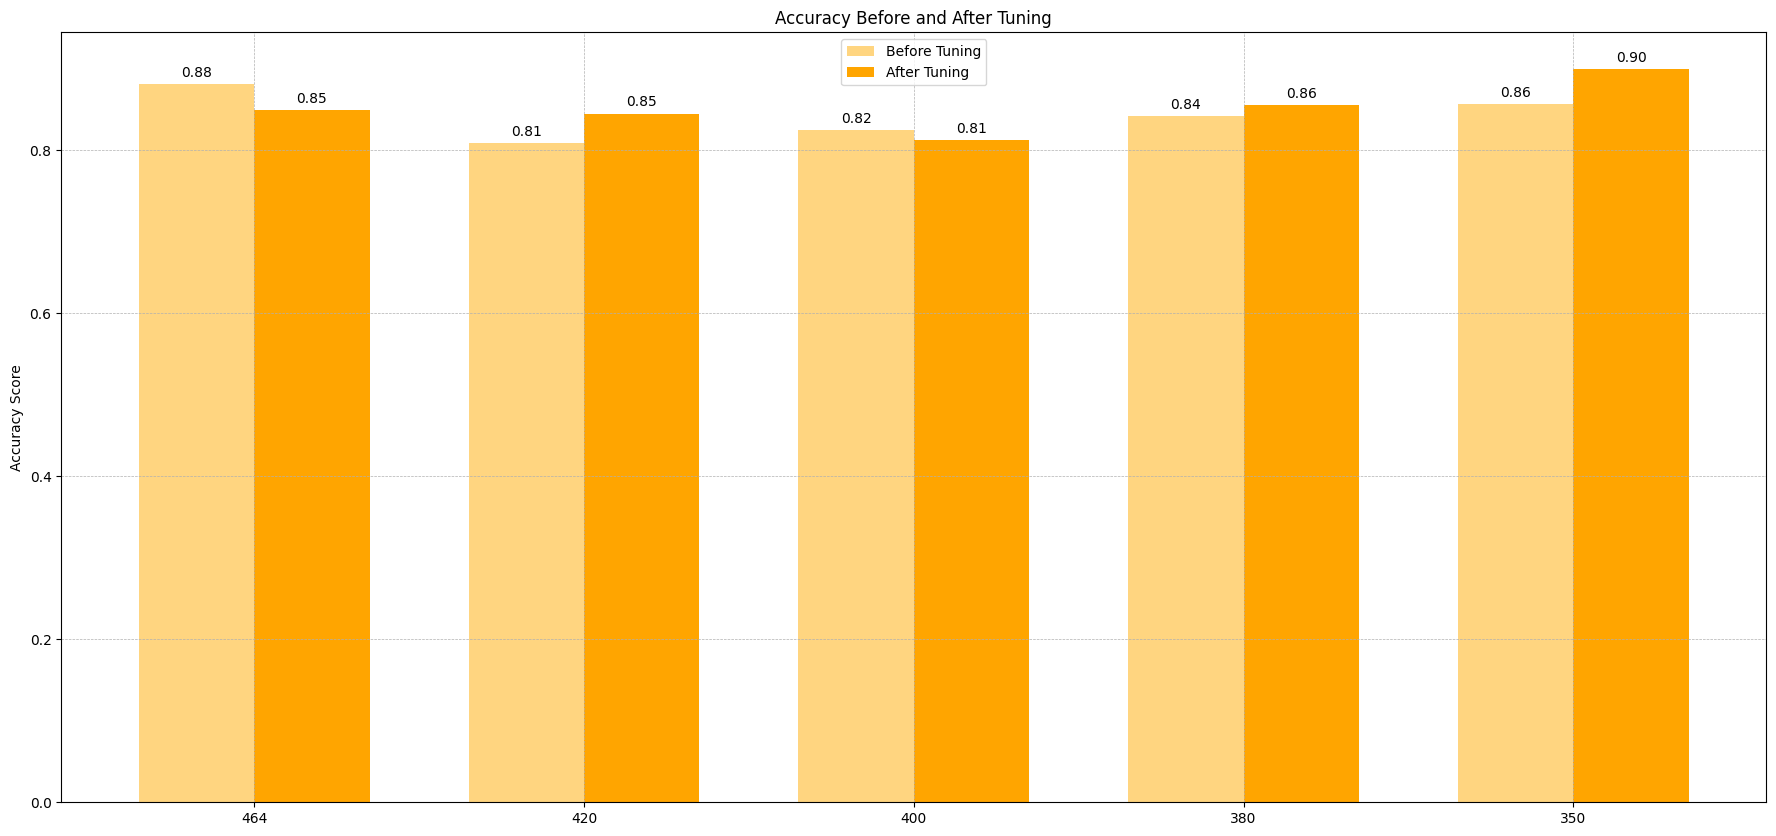

In [68]:
plot_performance(accuracy_before, accuracy_after, "Accuracy", "Accuracy Score")
plt.savefig("accuracy.png", format='png', dpi=200)
plt.show()

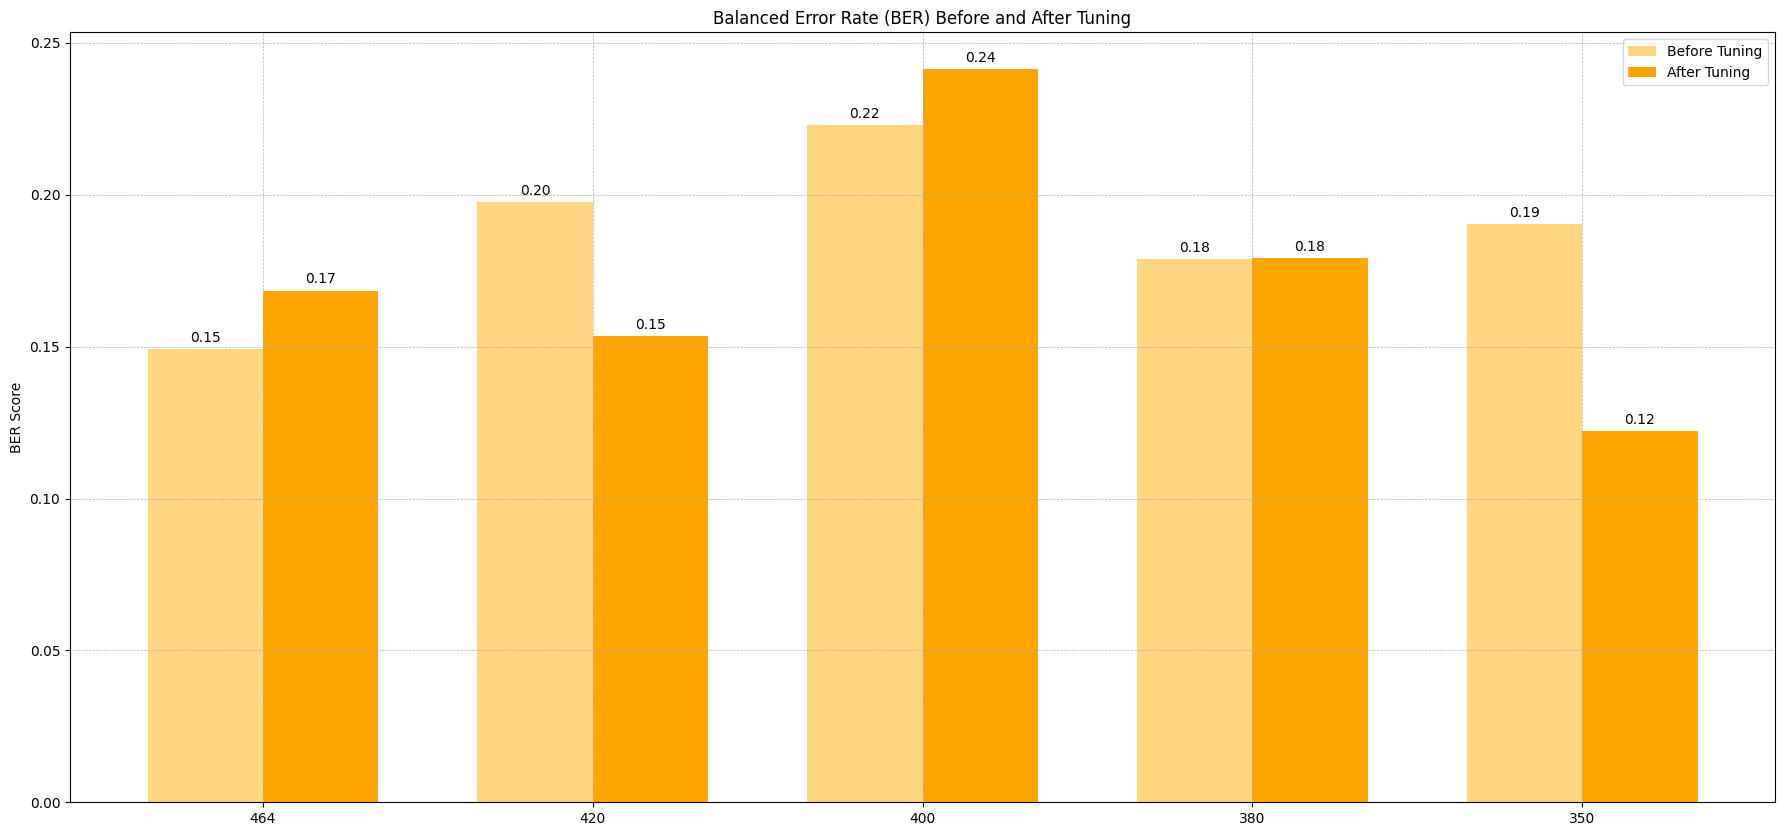

In [69]:
plot_performance(ber_before, ber_after, "Balanced Error Rate (BER)", "BER Score")
plt.savefig("ber.png", format='png', dpi=200)
plt.show()

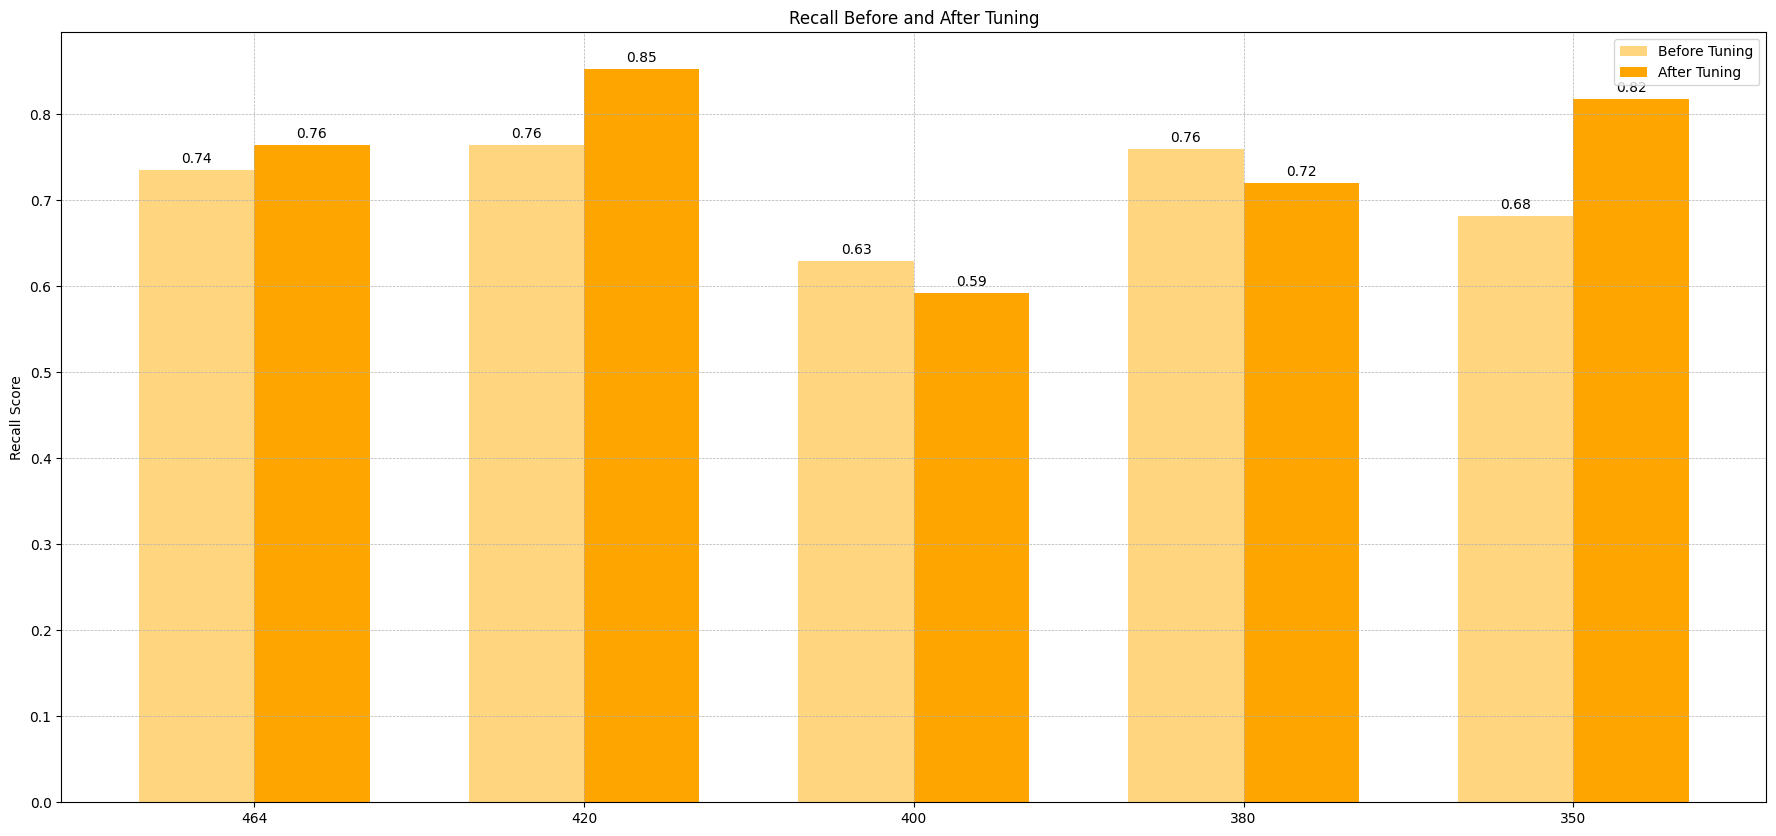

In [64]:
plot_performance(recall_before, recall_after, "Recall", "Recall Score")
plt.savefig("recall.png", format='png', dpi=200)
plt.show()

## Data Size of 380 may be the most promissing size to train Random Forest Regression!!

In [70]:
data_fined = data.sample(n=350, random_state=42)
data_fined

,link,label,text
9,https://doi.org/10.1021%2Facsenergylett.6b00327,1,Defect Passivation of Organic–Inorganic Hybrid...
30,https://doi.org/10.1038%2Fs41467-022-32047-z,1,Ammonia for post-healing of formamidinium-base...
39,https://www.science.org/doi/10.1126/science.ab...,1,Damp heat–stable perovskite solar cells with t...
443,https://doi.org/10.1016/j.cej.2009.08.008,0,Nanocrystalline zinc ferrite photocatalysts fo...
266,https://doi.org/10.1038%2Fnphoton.2013.341,0,Perovskite solar cells employing organic charg...
...,...,...,...
422,https://doi.org/10.1021/acsenergylett.0c02656,0,Solvents for Processing Stable Tin Halide Pero...
230,https://www.sciencedirect.com/science/article/...,0,The central role of colloids to explain the cr...
260,https://doi.org/10.1002/adma.201604113,0,Hybrid Perovskite Thin‐Film Photovoltaics: In ...
288,https://doi.org/10.1038%2Fnenergy.2016.93,0,Facet-dependent photovoltaic efficiency variat...


In [72]:
data_fined[data_fined['label']==1]

,link,label,text
9,https://doi.org/10.1021%2Facsenergylett.6b00327,1,Defect Passivation of Organic–Inorganic Hybrid...
30,https://doi.org/10.1038%2Fs41467-022-32047-z,1,Ammonia for post-healing of formamidinium-base...
39,https://www.science.org/doi/10.1126/science.ab...,1,Damp heat–stable perovskite solar cells with t...
72,https://doi.org/10.1038%2Fs41560-023-01288-7,1,Reduction of bulk and surface defects in inver...
70,https://doi.org/10.1021%2Facsenergylett.7b00442,1,Suppressed Ion Migration in Low-Dimensional Pe...
...,...,...,...
98,https://doi.org/10.1002%2Fadma.201902543,1,Perovskite Bifunctional Device with Improved E...
61,https://doi.org/10.1016%2Fj.nanoen.2019.03.014,1,Stable and scalable 3D-2D planar heterojunctio...
47,https://doi.org/10.1002%2Fadma.201600969,1,Thin Insulating Tunneling Contacts for Efficie...
32,https://doi.org/10.1002%2Fadma.201306281,1,Unique Properties of Halide Perovskites as Pos...


Next step: Actually start classifying

Best Parameters for Random Forest: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 200}

Evaluation Report for Tuned Random Forest350:

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.92      0.94      0.93        48
           1       0.86      0.82      0.84        22

    accuracy                           0.90        70
   macro avg       0.89      0.88      0.88        70
weighted avg       0.90      0.90      0.90        70

Confusion Matrix (Test Set):
 [[45  3]
 [ 4 18]]
Test Accuracy: 0.9
Train Accuracy: 0.9928571428571429
Test Recall: 0.8181818181818182
Balanced Error Rate (Test Set): 0.12215909090909083